## Observations and Insights 

In [40]:
%matplotlib notebook

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata
study_results
combine_dataset = pd.merge(mouse_metadata, study_results, on= "Mouse ID" )
# Display the data table for preview
combine_dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [42]:
# Checking the number of mice.
combine_dataset["Mouse ID"].nunique()

249

In [43]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = combine_dataset[combine_dataset.duplicated("Mouse ID")]
duplicate_df.value_counts("Mouse ID")

Mouse ID
g989    12
l471     9
k894     9
k862     9
k483     9
        ..
o813     1
n630     1
w678     1
w746     1
m756     1
Length: 237, dtype: int64

In [44]:
# Optional: Get all the data for the duplicate mouse ID. 



In [45]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combine_clean = combine_dataset.drop_duplicates(subset = "Mouse ID", keep = "last")
combine_clean = combine_clean.reset_index()
combine_clean

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,9,k403,Ramicane,Male,21,16,45,22.050126,1
1,19,s185,Capomulin,Female,3,17,45,23.343598,1
2,29,x401,Capomulin,Female,16,15,45,28.484033,0
3,39,m601,Capomulin,Male,22,17,45,28.430964,1
4,49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...,...
244,1859,z314,Stelasyn,Female,21,28,5,45.934712,0
245,1862,z435,Propriva,Female,12,26,10,48.710661,0
246,1872,z581,Infubinol,Female,24,25,45,62.754451,3
247,1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [46]:
# Checking the number of mice in the clean DataFrame.
combine_clean["Mouse ID"].nunique()

249

## Summary Statistics

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
combine_clean["Tumor Volume (mm3)"].describe()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
combine_drug_group = combine_clean.groupby("Drug Regimen")
combine_drug_mean = pd.DataFrame(combine_drug_group["Tumor Volume (mm3)"].mean())
combine_drug_median = pd.DataFrame(combine_drug_group["Tumor Volume (mm3)"].median())
combine_drug_var = pd.DataFrame(combine_drug_group["Tumor Volume (mm3)"].var())
combine_drug_std = pd.DataFrame(combine_drug_group["Tumor Volume (mm3)"].std())
combine_drug_SEM = pd.DataFrame(combine_drug_group["Tumor Volume (mm3)"].sem())

#merging series into DataFrame
merge_1 = pd.merge(combine_drug_mean, combine_drug_median, on = "Drug Regimen")
merge_1rename = merge_1.rename(columns = {"Tumor Volume (mm3)_x": "Tumor Vol. Mean",
                                         "Tumor Volume (mm3)_y": "Tumor Vol Median"})
merge_2 = pd.merge(merge_1rename, combine_drug_var, on = "Drug Regimen")
merge_2rename = merge_2.rename(columns = {"Tumor Volume (mm3)": " Tumor Vol Variance"})


merge_3 = pd.merge(merge_2rename, combine_drug_std, on = "Drug Regimen")
merge_3rename = merge_3.rename(columns = {"Tumor Volume (mm3)": " Tumor Vol StrdDev"})

merge_4 = pd.merge(merge_3rename, combine_drug_SEM, on = "Drug Regimen")
tumor_vol_by_drug_df = merge_4.rename(columns = {"Tumor Volume (mm3)": " Tumor Vol SEM"})
tumor_vol_by_drug_df

,Tumor Vol. Mean,Tumor Vol Median,Tumor Vol Variance,Tumor Vol StrdDev,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_mean_rename=combine_drug_mean.rename(columns = {"Tumor Volume (mm3)":"Mean"})
drug_mean_rename
drug_median_rename=combine_drug_median.rename(columns = {"Tumor Volume (mm3)":"Median"})
drug_median_rename
drug_var_rename=combine_drug_var.rename(columns = {"Tumor Volume (mm3)":"Variance"})
drug_var_rename
drug_std_rename=combine_drug_std.rename(columns = {"Tumor Volume (mm3)":"Strd Dev"})
drug_std_rename
drug_SEM_rename=combine_drug_SEM.rename(columns = {"Tumor Volume (mm3)":"SEM"})
drug_SEM_rename


# Using the aggregation method, produce the same summary statistics in a single line
drug_m_m = pd.merge(drug_mean_rename, drug_median_rename, on = "Drug Regimen")
drug_m_v = pd.merge(drug_m_m, drug_var_rename, on = "Drug Regimen")
drug_mvs = pd.merge(drug_m_v, drug_std_rename, on = "Drug Regimen")
drug_mvss =pd.merge(drug_mvs, drug_SEM_rename, on = "Drug Regimen")
drug_mvss


,Mean,Median,Variance,Strd Dev,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar and Pie Charts

<IPython.core.display.Javascript object>


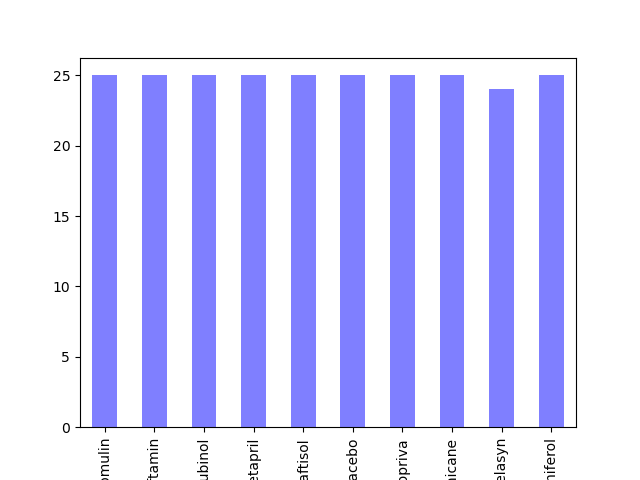

<AxesSubplot:xlabel='Drug Regimen'>

In [49]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
by_reg = combine_clean.groupby(["Drug Regimen"]).nunique()
by_reg_ID = by_reg["Mouse ID"]


#fig, axes = plt.subplots(2,1)

data = by_reg_ID
data.plot(kind = "bar", color = 'b', alpha = 0.5)

#fig, axes = plt.





<IPython.core.display.Javascript object>


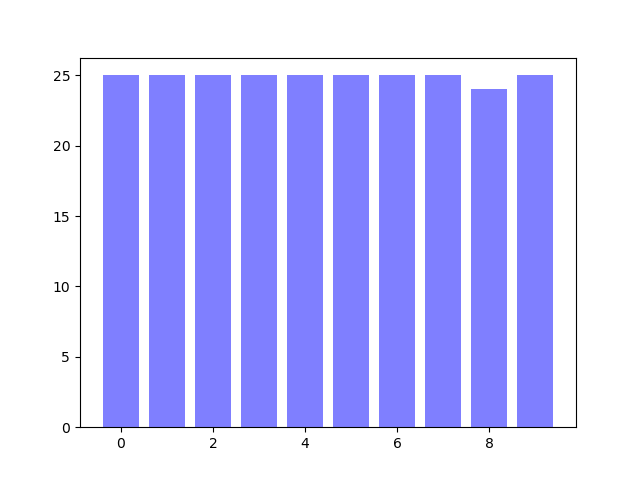

<BarContainer object of 10 artists>

In [50]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

drugs = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol",
         "Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
mice_per_drug = [25,25,25,25,25,25,25,25,24,25]
x_axis = np.arange(len(drugs))
plt.bar(x_axis, mice_per_drug, color = 'b', alpha = 0.5)
#plt.show();

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

m_or_f = combine_clean.groupby(["Sex"]).nunique()
m_or_f_ID = m_or_f["Mouse ID"]
m_or_f_ID

data = m_or_f_ID
data.plot.pie

<bound method PlotAccessor.pie of <pandas.plotting._core.PlotAccessor object at 0x7fa61ad55ac0>>

<IPython.core.display.Javascript object>


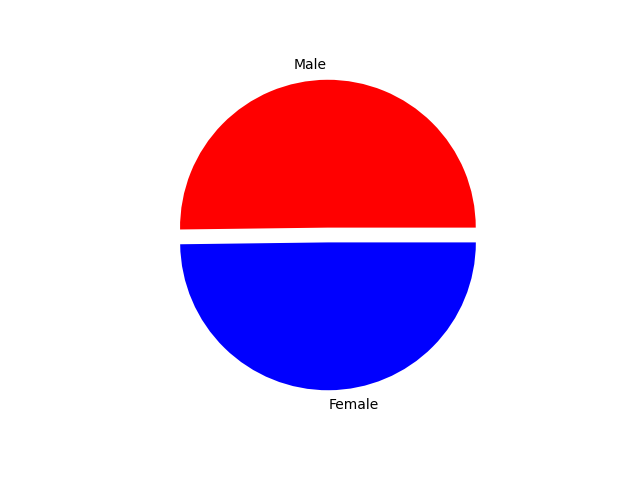

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_df = combine_clean["Sex"].value_counts()
gender_df

labels = ["Male","Female"]
size = [125,124]
colors = ["red","blue"]
explode = (0.1,0)

plt.pie(size, explode = explode, labels = labels, colors = colors)
plt.show();

## Quartiles, Outliers and Boxplots

In [53]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
combine_tp_vol = combine_clean[["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
combine_tp_vol
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,45,22.050126
1,s185,Capomulin,45,23.343598
2,x401,Capomulin,45,28.484033
3,m601,Capomulin,45,28.430964
4,g791,Ramicane,45,29.128472
...,...,...,...,...
244,z314,Stelasyn,5,45.934712
245,z435,Propriva,10,48.710661
246,z581,Infubinol,45,62.754451
247,z795,Naftisol,45,65.741070


In [78]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
capo_vol = []
ram_vol = []
infu_vol=[]
ceft_vol = []
tumor_vol = []





capo_combine_tp_vol=combine_tp_vol.loc[combine_tp_vol["Drug Regimen"]=="Capomulin"]
capo_combine_tp_vol
#for treatment in treatments:
#    if treatment == "Capomulin":
#        tumor_vol.append(capo_combine_tp_vol["Tumor Volume (mm3)"])


ram_combine_tp_vol=combine_tp_vol.loc[combine_tp_vol["Drug Regimen"]=="Ramicane"]
ram_combine_tp_vol
#for treatment in treatments:
#    if treatment == "Ramicane":
#        tumor_vol.append(ram_combine_tp_vol["Tumor Volume (mm3)"])
        

infu_combine_tp_vol=combine_tp_vol.loc[combine_tp_vol["Drug Regimen"]=="Infubinol"]
infu_combine_tp_vol
#for treatment in treatments:
#    if treatment == "Infubinol":
#        tumor_vol.append(infu_combine_tp_vol["Tumor Volume (mm3)"])


ceft_combine_tp_vol=combine_tp_vol.loc[combine_tp_vol["Drug Regimen"]=="Ceftamin"]
ceft_combine_tp_vol
#for treatment in treatments:
#    if treatment == "Ceftamin":
#        tumor_vol.append(ceft_combine_tp_vol["Tumor Volume (mm3)"])
#tumor_vol
cr = pd.concat([capo_combine_tp_vol, ram_combine_tp_vol])
cri = pd.concat([cr,infu_combine_tp_vol])
cric = pd.concat([cri, ceft_combine_tp_vol])
cric
# Create empty list to fill with tumor vol data (for plotting)
#tumor_vol = []
#tumor_vol = [capo_vol + ram_vol + infu_vol + ceft_vol]


# Calculate the IQR and quantitatively determine if there are any potential outliers.  
quartiles = cric["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr= upperq - lowerq
iqr
print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"the interquartile range of Tumor Volume is: {iqr}")
print(f"The median of Tumor Volume is: {quartiles[0.5]}")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
cric_id_v = cric[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]].reset_index()
cric_id_v
    # add subset 
lower_bound = lowerq -(1.5*iqr)
upper_bound = upperq +(1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

    
    # Determine outliers using upper and lower bounds
outlier_occupancy = cric_id_v.loc[(cric_id_v["Tumor Volume (mm3)"]< lower_bound)|
                                 (cric_id_v["Tumor Volume (mm3)"]> upper_bound)]  
outlier_occupancy

The lower quartile of Tumor Volume is: 37.187743802499995
The upper quartile of Tumor Volume is: 59.930261755000004
the interquartile range of Tumor Volume is: 22.74251795250001
The median of Tumor Volume is: 45.0
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


,index,Mouse ID,Drug Regimen,Tumor Volume (mm3)


<IPython.core.display.Javascript object>


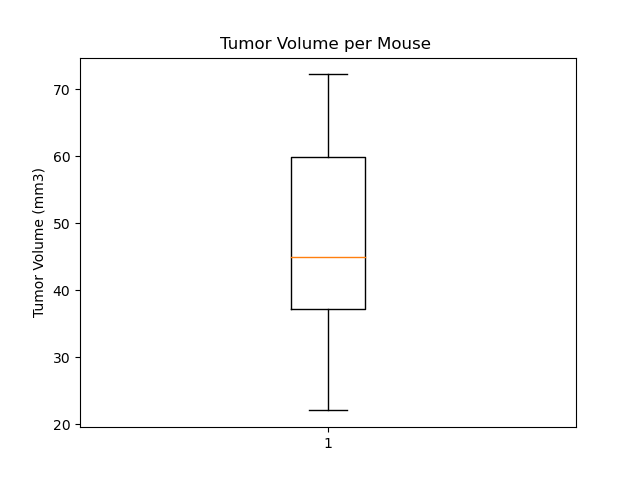

In [79]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume per Mouse ")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(cric_id_v["Tumor Volume (mm3)"])
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


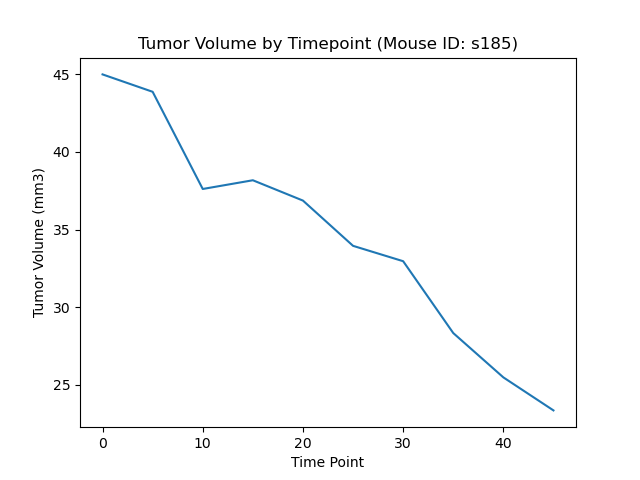

In [56]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
combine_dataset[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
capomulin_dataset = combine_dataset.loc[combine_dataset["Drug Regimen"]=="Capomulin"]
capomulin_dataset
capo_mouse_data = capomulin_dataset.loc[capomulin_dataset["Mouse ID"]=="s185"]
capo_mouse_data

x_axis = []

for timepoint in capo_mouse_data["Timepoint"]:
    x_axis.append(timepoint)


y_axis = []

for tumor_vol in capo_mouse_data["Tumor Volume (mm3)"]:
    y_axis.append(tumor_vol)

plt.title("Tumor Volume by Timepoint (Mouse ID: s185)")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")

plt.plot(x_axis,y_axis)


<IPython.core.display.Javascript object>


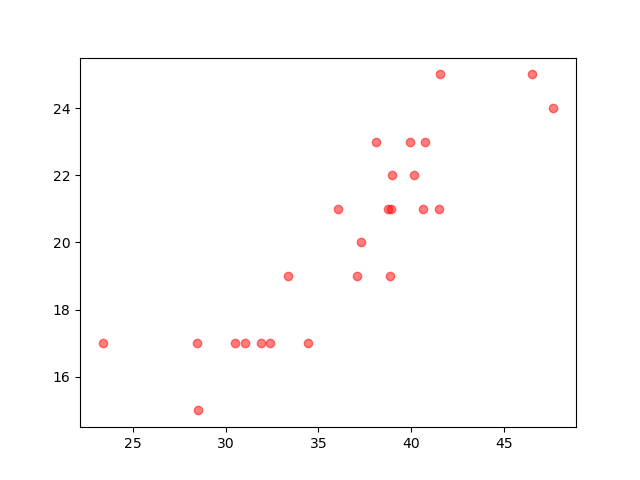

In [57]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

data_set = combine_clean[["Mouse ID", "Drug Regimen", "Weight (g)", "Tumor Volume (mm3)"]]
cap_dataset = data_set.loc[data_set["Drug Regimen"]=="Capomulin"]
cap_dataset


x_axis = cap_dataset["Tumor Volume (mm3)"]
y_axis = cap_dataset["Weight (g)"]

plt.scatter(x_axis, y_axis, marker = "o", color = "r", alpha = 0.5)

## Correlation and Regression

<IPython.core.display.Javascript object>


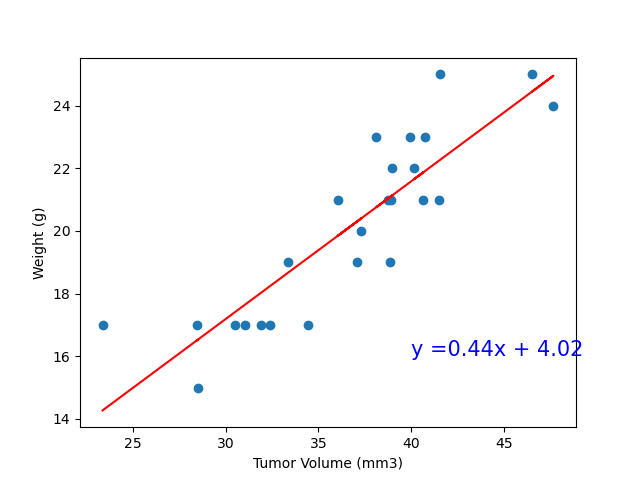

The r-squared is: 0.7686134812139


In [59]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values =  cap_dataset["Tumor Volume (mm3)"]
y_values = cap_dataset["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,16), fontsize = 15, color = "blue")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
print(f"The r-squared is: {rvalue**2}")
plt.show()